# Recurrent Neural Networks

In this notebook, we train a RNN with the use of Keras.

In [1]:
!pip install keras

In [2]:
import numpy as np
import pandas as pd
import keras 

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# -- Keras Import
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.preprocessing import image

from keras.datasets import imdb
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, GRU, SimpleRNN

from keras.layers import Activation, TimeDistributed, RepeatVector
from keras.callbacks import EarlyStopping, ModelCheckpoint

%matplotlib inline

Using TensorFlow backend.


## 1. Load IMDB Database

In [3]:
max_features = 20000
maxlen = 100  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print("Loading data...")
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')


Loading data...
25000 train sequences
25000 test sequences


## 2. Visualize the Data

In [4]:
print('Example:')
print(X_train[:1])

print("Pad sequences (samples x time)")
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Example:
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])]
Pad sequences (samples x time)


## 3. Setup the Model

In [9]:
print('Build model...SimpleRNN')
Simple_RNN_model = Sequential()
Simple_RNN_model.add(Embedding(max_features, 128, input_length=maxlen))
Simple_RNN_model.add(SimpleRNN(128))  
Simple_RNN_model.add(Dropout(0.5))
Simple_RNN_model.add(Dense(1))
Simple_RNN_model.add(Activation('sigmoid'))

print('Build model...GRU')
GRU_model = Sequential()
GRU_model.add(Embedding(max_features, 128, input_length=maxlen))
GRU_model.add(GRU(128))  
GRU_model.add(Dropout(0.5))
GRU_model.add(Dense(1))
GRU_model.add(Activation('sigmoid'))

print('Build model...LSTM')
LSTM_model = Sequential()
LSTM_model.add(Embedding(max_features, 128, input_length=maxlen))
LSTM_model.add(LSTM(128))  
LSTM_model.add(Dropout(0.5))
LSTM_model.add(Dense(1))
LSTM_model.add(Activation('sigmoid'))


Build model...SimpleRNN
Build model...GRU
Build model...LSTM


## 4. Summary of the model

In [10]:
print('Simple RNN Summary')
Simple_RNN_model.summary()
print('\n')

print('GRU Summary')
GRU_model.summary()
print('\n')

print('LSTM Summary')
LSTM_model.summary()
print('\n')

Simple RNN Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________


GRU Summary
_________________________________________________________________
Layer (type)                 Outp

## 5. Compile the model

In [11]:
# try using different optimizers and different optimizer configs


Simple_RNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print('Simple RNN compliation Complete!')
print('\n')

GRU_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print('GRU compliation Complete!')
print('\n')

LSTM_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print('LSTM compliation Complete!')
print('\n')

Simple RNN compliation Complete!


GRU compliation Complete!


LSTM compliation Complete!




## 6. Train the Model

In [14]:
from keras.callbacks import ModelCheckpoint   

# Function to later visulaze the accuracy/performance of the model
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

model_hist = {}

print('Train the GRU model...')
checkpointerGRU = ModelCheckpoint(filepath='modelGRU.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model_hist['GRU'] = GRU_model.fit(X_train, y_train, batch_size=32, epochs=10,
          validation_data=(X_test, y_test), callbacks=[checkpointerGRU,history], 
          verbose=2, shuffle=True)
print('\n')

print('Train the LSTM model...')
checkpointerLSTM = ModelCheckpoint(filepath='modelLSTM.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model_hist['LSTM'] = LSTM_model.fit(X_train, y_train, batch_size=32, epochs=10,
          validation_data=(X_test, y_test), callbacks=[checkpointerLSTM,history], 
          verbose=2, shuffle=True)
print('\n')

print('Train the Simple RNN model...')
checkpointerRNN = ModelCheckpoint(filepath='modelRNN.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model_hist['RNN'] = Simple_RNN_model.fit(X_train, y_train, batch_size=32, epochs=10,
          validation_data=(X_test, y_test), callbacks=[checkpointerRNN,history], 
          verbose=2, shuffle=True)
print('\n')



Train the GRU model...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
 - 133s - loss: 0.4423 - acc: 0.7849 - val_loss: 0.3454 - val_acc: 0.8483

Epoch 00001: val_loss improved from inf to 0.34541, saving model to modelGRU.weights.best.hdf5
Epoch 2/10
 - 130s - loss: 0.2334 - acc: 0.9084 - val_loss: 0.3561 - val_acc: 0.8542

Epoch 00002: val_loss did not improve
Epoch 3/10
 - 132s - loss: 0.1235 - acc: 0.9552 - val_loss: 0.4436 - val_acc: 0.8442

Epoch 00003: val_loss did not improve
Epoch 4/10
 - 132s - loss: 0.0612 - acc: 0.9795 - val_loss: 0.5335 - val_acc: 0.8338

Epoch 00004: val_loss did not improve
Epoch 5/10
 - 132s - loss: 0.0358 - acc: 0.9883 - val_loss: 0.7078 - val_acc: 0.8365

Epoch 00005: val_loss did not improve
Epoch 6/10
 - 132s - loss: 0.0200 - acc: 0.9939 - val_loss: 0.7632 - val_acc: 0.8294

Epoch 00006: val_loss did not improve
Epoch 7/10
 - 131s - loss: 0.0159 - acc: 0.9950 - val_loss: 0.8808 - val_acc: 0.8289

Epoch 00007: val_loss did not improve
Ep

 - 77s - loss: 0.2899 - acc: 0.8904 - val_loss: 0.5044 - val_acc: 0.8011

Epoch 00006: val_loss did not improve
Epoch 7/10
 - 77s - loss: 0.2858 - acc: 0.8930 - val_loss: 0.5615 - val_acc: 0.7363

Epoch 00007: val_loss did not improve
Epoch 8/10
 - 77s - loss: 0.2753 - acc: 0.8990 - val_loss: 0.5663 - val_acc: 0.7926

Epoch 00008: val_loss did not improve
Epoch 9/10
 - 78s - loss: 0.2230 - acc: 0.9196 - val_loss: 0.5459 - val_acc: 0.7727

Epoch 00009: val_loss did not improve
Epoch 10/10
 - 77s - loss: 0.3003 - acc: 0.8828 - val_loss: 0.6036 - val_acc: 0.7675

Epoch 00010: val_loss did not improve




## 8. Load the Model with the Best Validation Accuracy

In [0]:
# load the weights that yielded the best validation accuracy

Simple_RNN_model.load_weights('modelRNN.weights.best.hdf5')

GRU_model.load_weights('modelGRU.weights.best.hdf5')

LSTM_model.load_weights('modelLSTM.weights.best.hdf5')

## 9. Calculate Classification Accuracy on Test Set

In [17]:
# evaluate and print test accuracy
scoreRNN = Simple_RNN_model.evaluate(X_test, y_test, verbose=0)
print('\n', 'Simple RNN Test Accuracy:', scoreRNN[1])

scoreGRU = GRU_model.evaluate(X_test, y_test, verbose=0)
print('\n', 'GRU Test Accuracy:', scoreGRU[1])

scoreLSTM = LSTM_model.evaluate(X_test, y_test, verbose=0)
print('\n', 'LSTM Test Accuracy:', scoreLSTM[1])



 Simple RNN Test Accuracy: 0.783

 GRU Test Accuracy: 0.84828

 LSTM Test Accuracy: 0.84676


## 10. Visulalize the Accuracy of RNN Model

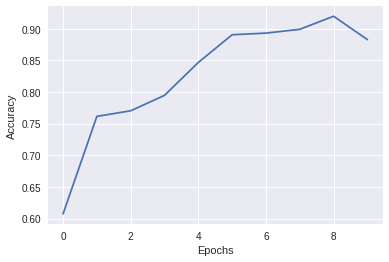

In [20]:
import numpy as np

accuracy = np.array(history.acc)

plt.plot(range(10), accuracy)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Forgot to mointor the accuracy of the GRU, and LSTM.